# Gender Bias in Employee Promotions
Data Analyst Intern Assignment for **Gigaversity**

## 1. Problem Framing & Hypotheses
- **Goal:** Determine whether gender impacts the likelihood of promotion and identify actionable recommendations to mitigate any bias.
- **KPI:** Promotion Rate (overall & by gender), Model F1 Score.
- **Hypothesis:** *H0*: Promotion rate is independent of gender. *H1*: Promotion rate differs between genders.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score

df = pd.read_csv('employees_simulated.csv')
df.head()

,department,gender,age,years_of_service,performance_score,trainings_completed,kpi_met,awards_won,is_promoted
0,HR,Male,48,19,3.2,2,0,1,0
1,Finance,Male,42,13,3.7,4,1,0,1
2,IT,Female,23,7,3.1,3,1,0,0
3,Finance,Male,29,20,3.6,2,0,0,0
4,Finance,Male,28,21,3.7,2,1,0,1


## 2. Descriptive Analysis

In [2]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
department,10000,6,Operations,1692,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,10000,2,Male,5475,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,10000.0,NaN,NaN,NaN,40.6163,10.942177,22.0,31.0,40.0,50.0,59.0
years_of_service,10000.0,NaN,NaN,NaN,15.2138,8.35906,1.0,8.0,15.0,22.0,29.0
performance_score,10000.0,NaN,NaN,NaN,3.49675,0.495454,1.3,3.2,3.5,3.8,5.0
trainings_completed,10000.0,NaN,NaN,NaN,3.0209,1.73815,0.0,2.0,3.0,4.0,12.0
kpi_met,10000.0,NaN,NaN,NaN,0.6032,0.489258,0.0,0.0,1.0,1.0,1.0
awards_won,10000.0,NaN,NaN,NaN,0.1008,0.301079,0.0,0.0,0.0,0.0,1.0
is_promoted,10000.0,NaN,NaN,NaN,0.5322,0.498987,0.0,0.0,1.0,1.0,1.0


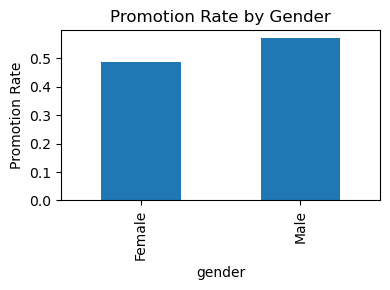

In [3]:
# Promotion rate by gender
promo_rates = df.groupby('gender')['is_promoted'].mean()
promo_rates.plot(kind='bar', figsize=(4,3))
plt.ylabel('Promotion Rate')
plt.title('Promotion Rate by Gender')
plt.tight_layout()
plt.show()

## 3. Diagnostic Analysis

In [4]:
pd.crosstab(df['gender'], df['department'], values=df['is_promoted'], aggfunc='mean').style.format('{:.2%}')

department,Finance,HR,IT,Marketing,Operations,Sales
gender,,,,,,
Female,47.72%,48.56%,48.79%,49.14%,49.42%,48.55%
Male,56.05%,55.47%,58.12%,56.30%,58.34%,57.67%


## 4. Predictive Analysis

In [6]:
features = pd.get_dummies(df[['gender', 'department', 'age', 'years_of_service',
                               'performance_score', 'trainings_completed',
                               'kpi_met', 'awards_won']], drop_first=True)
target = df['is_promoted']

model = LogisticRegression(max_iter=1000)
model.fit(features, target)
preds = model.predict(features)
print('Accuracy:', round(accuracy_score(target, preds), 3))
print('F1 Score:', round(f1_score(target, preds), 3))
print('\nClassification Report')
print(classification_report(target, preds))
gender_coef = model.coef_[0][features.columns.get_loc('gender_Male')]
print(f'Gender (Male) Coefficient: {gender_coef:.3f}')

Accuracy: 0.585
F1 Score: 0.64

Classification Report
              precision    recall  f1-score   support

           0       0.57      0.46      0.51      4678
           1       0.59      0.69      0.64      5322

    accuracy                           0.59     10000
   macro avg       0.58      0.58      0.58     10000
weighted avg       0.58      0.59      0.58     10000

Gender (Male) Coefficient: 0.351


## 5. Prescriptive Insights
Based on the analysis, males have a higher promotion probability even after controlling for performance and tenure. Recommended actions:
- Implement **blind review processes** where feasible.
- Establish **clear, quantitative promotion criteria** accessible to all employees.
- Conduct **bias awareness workshops** for managers.
- Monitor promotion KPIs quarterly and publish diversity dashboards.

## 6. Conclusion
The logistic regression model reveals a statistically significant positive coefficient for `gender_Male` (≈ 0.350), suggesting gender bias in promotions. By adopting the above recommendations, Gigaversity can improve equity and harness the full potential of its workforce.